# Extracting historical climate (rainfall) data over selected basins

* **Products used:** 
ERA5

## Getting started
To run this analysis, run all the cells in the notebook, starting with the "Load packages" cell. 

### Load packages
Import Python packages that are used for the analysis.

In [12]:
%matplotlib inline

import datacube
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd

from deafrica_tools.spatial import xr_rasterize
from deafrica_tools.load_era5 import load_era5

## Define areas of interest in the Okavango Basin

In [2]:
# load basin polygons
# Original shapefile from https://data.apps.fao.org/map/catalog/srv/api/records/57bb1c95-2f00-4def-886f-caee3d756da9

basin = gpd.read_file('data/OB_FWR_Hydrography_Okavango_Subasins_polygon.geojson')

In [3]:
# upstream include Cuito and Cubango subbasins

upstream = basin[basin.Subbasin.isin(['Cuito', 'Cubango'])]
upstream

,CLASS_ID,Longitude,Latitude,Subbasin,Sph_Area,Sph_Len,Parts,Vertices,geometry
0,0,19.003252,-15.179938,Cuito,5.902293e+10,2285720.103,1.0,9326.0,"POLYGON ((17.85205 -13.53846, 17.85205 -13.536..."
1,0,17.870032,-15.740153,Cubango,1.078813e+11,3071839.684,1.0,11314.0,"POLYGON ((15.99370 -13.93323, 15.99370 -13.931..."


In [4]:
# delta is part of the Okavango subbasin

delta = basin[basin.Subbasin.isin(['Okavango'])]

## Retrieve historical rainfall data over all areas of interest

In [5]:
# get historical rainfall for upstream and delta

bounds = upstream.append(delta).total_bounds
lat = bounds[1], bounds[3]
lon = bounds[0], bounds[2]

# define time period of interest
time = ' 2010', '2020'

In [6]:
# download ERA5 rainfall and aggregate to monthly

var = 'precipitation_amount_1hour_Accumulation'
precip = load_era5(var, lat, lon, time, reduce_func=np.sum, resample='1M').compute()

In [7]:
# fix inconsistency in axis names

precip = precip.rename({'lat':'latitude', 'lon':'longitude'})

In [8]:
# area mask for upstream and okavango regions

upstream_raster = xr_rasterize(upstream, precip, x_dim='longitude', y_dim='latitude')
delta_raster = xr_rasterize(delta, precip, x_dim='longitude', y_dim='latitude')

In [9]:
# total rainfall over each area

upstream_rainfall = precip[var].where(upstream_raster).sum(['latitude','longitude'])
okavango_rainfall = precip[var].where(delta_raster).sum(['latitude','longitude'])

## Visualize historical rainfall and compare to water extent changes

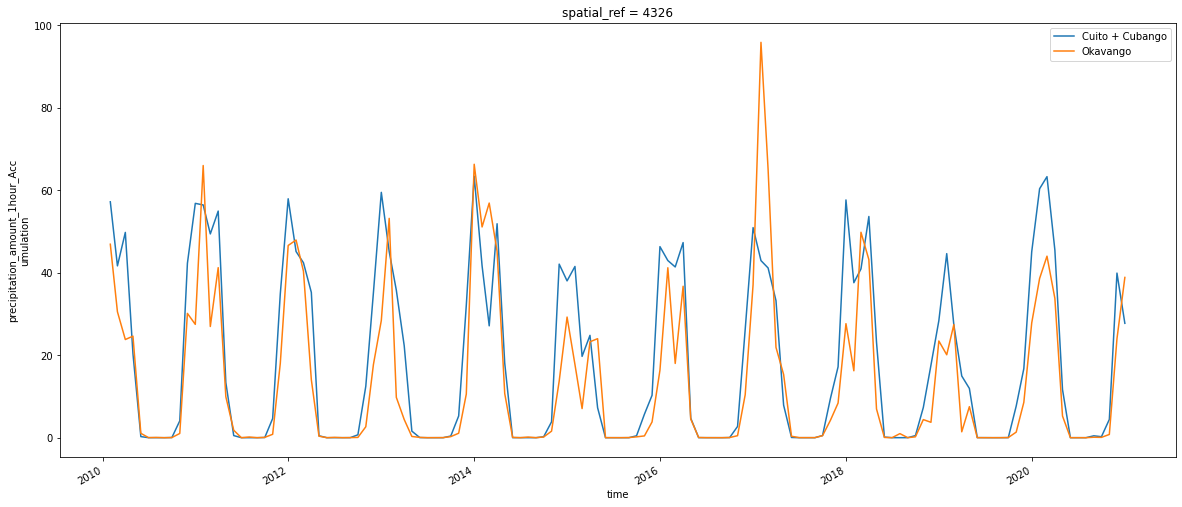

In [10]:
upstream_rainfall.plot(label='Cuito + Cubango', figsize=(20,8));
okavango_rainfall.plot(label='Okavango');
plt.legend();

***

## Additional information

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Africa data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

**Contact:** If you need assistance, please post a question on the [Open Data Cube Slack channel](http://slack.opendatacube.org/) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).
If you would like to report an issue with this notebook, you can file one on [Github](https://github.com/digitalearthafrica/deafrica-sandbox-notebooks).

**Compatible datacube version:** 

In [13]:
print(datacube.__version__)

1.8.4.dev81+g80d466a2


**Last Tested:**

In [ ]:
from datetime import datetime
datetime.today().strftime('%Y-%m-%d')